## Hopfield network
### Theoretical background
A Hopfield Network is a type of recurrent neural network composed of interconnected neurons, or nodes, which can have binary states, typically +1 and -1 (or alternatively, 1 and 0). Each neuron represents an element of memory or a specific pattern. In this fully connected network, every neuron connects to every other neuron include itself, with self-connections often set to zero. The connections between neurons are assigned weights, which are usually binary values of +1 or -1, indicating the strength of the association between them.

An important feature of a Hopfield Network is its energy function, which helps the network determine its state. As the network approaches a stable state—one that corresponds to a stored pattern or set of patterns—its energy level decreases. The network updates its states in discrete time steps, influenced by the states of the neurons to which each is connected. Typically, neurons update their states according to a simple rule, like the McCulloch-Pitts model, either asynchronously (one neuron at a time) or sequentially, until the network reaches a stable state.

**The Architecture of a Hopfield Network:**
The Hopfield network architecture consists of the following components:
* Each node retains its current state until an update is required.
* Nodes are updated one at a time, selected randomly.
* Every node is connected to all other nodes, except itself.
* Each node can have a state of either 0 and 1, or +1 and -1.
Below is an illustration of a Hopfield network with a three-node example architecture:

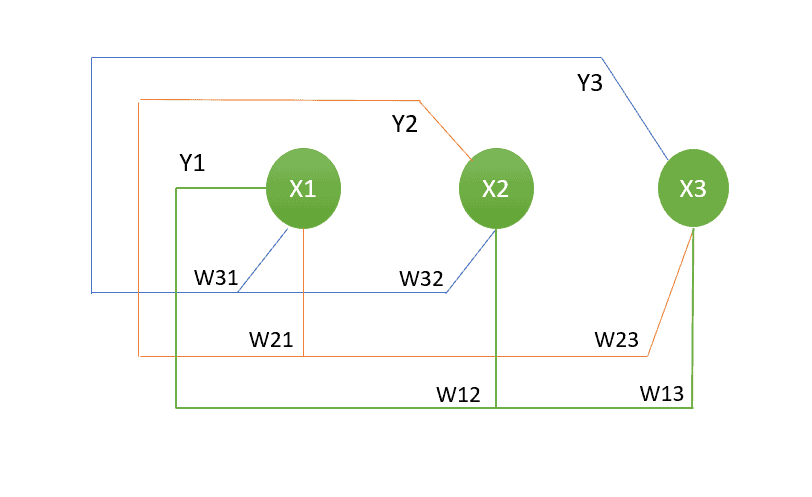 

Each symbol in the diagram above denotes:

* $x_1$, $x_2$ , and $x_3$  stand in for the input.
* Each node’s output is represented by the numbers $y_1$ , $y_2$ , and $y_3$ .
* $W_{ij}$ is a symbol for the weight of the link between $i$ and $j$.

**Training A Hopfield Network:**

*1.Initialization:*
* Define the weight matrix $𝑊$, trained with patterns using the Hebbian learning rule:
  $${\displaystyle W_{ij}={\frac {1}{N}}\sum _{p=1}^{P}x_i^{p}x_j^{p}}$$
    In this formula:
* $W_{ij}$ represents the weight between neuron $i$ and neuron $j$.
* $N$ is the total number of neurons in the network.
* $P$ is the number of patterns to be stored.
* $x_i^p$ and $x_j^p$ are the states of neurons $i$ and $j$ in the $p-th$ pattern, where $p$ ranges from $1$ to $P$.

*2.Input State:*
* Start with an input vector $S^{0}$ , which could be noisy or incomplete.

*3.Update Rule:*
* For each neuron $i$:
    $${\displaystyle h_i=\sum _{j}W_{ij}S_j}$$
  where $h_i$ is the net input to neuron $i$.

* Update the state of neuron $i$ using a threshold function:

  
    $${S_i=sign(h_i)=\begin{cases}1 & if\;h_i > 0\\-1 & if\;h_i < 0\\S_i & if \;h_i = 0\end{cases} }$$
  
*4.Iterate Until Convergence:*
* Repeat the update step for all neurons (synchronously or asynchronously) until the network stabilizes, i.e., no further changes in $S$.

*5.Output:*
* The stable state $S^{(final)}$ represents the recalled pattern.


**Applications:**

* Pattern Recognition: Identifying patterns accurately, even with incomplete or noisy inputs.
* Image Restoration: Reconstructing corrupted or missing parts of images.
Optimization: Solving optimization problems, such as the traveling salesman problem.
Content-Addressable Memory: Accessing information based on content rather than address.

**Advantages:**

* Simplicity and Robustness: Straightforward to implement and resistant to noise.
* Associative Memory: Capable of recalling patterns even with partial or noisy inputs.
* Energy Minimization: Provides a clear objective function, aiding in training and analysis.

**Disadvantages:**
* Limited Storage Capacity: Can only store a finite number of patterns before interference occurs.
* Susceptibility to Spurious States: May converge on unwanted local minima.
Not Suited for Complex Tasks: Has limitations with sequential or temporal data.
In essence, a Hopfield network is an effective tool for pattern storage and retrieval, highlighting the potential of neural networks in solving real-world problems.

### Implemenation in Python

**Install modules**

In [12]:
#pip install numpy

In [13]:
#pip install matplotlib

**Import modules**

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))
    
    def train(self, patterns):
        """
        Train the Hopfield network using the Hebbian learning rule.
        """
        for pattern in patterns:
            pattern = pattern.flatten()
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)  # No self-connections
        self.weights /= len(patterns)  # Normalize by the number of patterns
    
    def recall(self, pattern, steps=10000):
        """
        Recall a pattern using asynchronous update.
        """
        pattern = pattern.flatten()
        for _ in range(steps):
            i = np.random.randint(0, self.size)
            pattern[i] = 1 if np.dot(self.weights[i], pattern) > 0 else -1
        return pattern.reshape(int(np.sqrt(self.size)), int(np.sqrt(self.size)))

    def plot_pattern(self, pattern, title="Pattern"):
        """
        Plot a 16x16 pattern.
        """
        plt.imshow(pattern)
        plt.title(title)
        plt.axis("off")
        plt.show()

**Initialize the HopfieldNetwork**

In [15]:
# Create a 16x16 grid Hopfield network
grid_size = 16
hopfield_net = HopfieldNetwork(grid_size**2)



**Generate pattern**

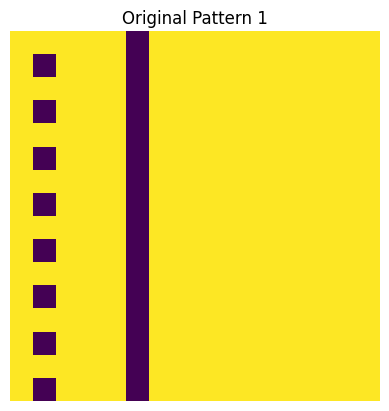

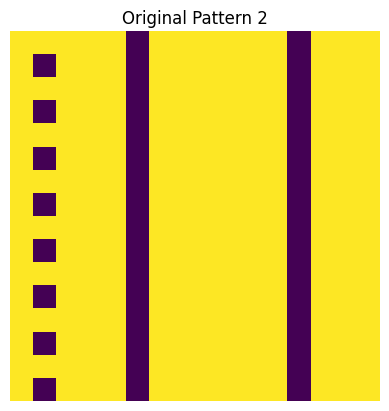

In [16]:
# Generate and train on patterns
data_1 = [[1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,1,1,1,1]]

data_2 = [[1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, 1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1],
       [1, -1, 1, 1, 1 ,-1,1,1,1,1,1,1,-1,1,1,1]]
pattern1 = np.array(data_1)
pattern2 = np.array(data_2)
patterns = [pattern1, pattern2]

# Plot the original patterns
hopfield_net.plot_pattern(pattern1, "Original Pattern 1")
hopfield_net.plot_pattern(pattern2, "Original Pattern 2")

**Train the HopfieldNetwork**

In [17]:
hopfield_net.train(patterns)

**Generate pattern with noise**

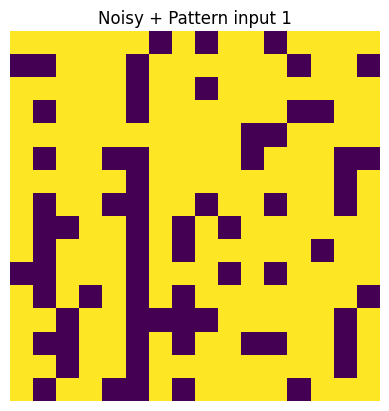

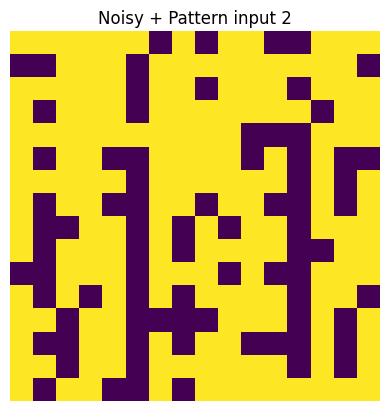

In [18]:
# Test recall with noisy pattern

noise_indices = np.random.choice(grid_size**2, size=50, replace=False)  # Add noise to 50 cells

noisy_pattern_1 = pattern1.copy()
noisy_pattern_1 = noisy_pattern_1.flatten()
noisy_pattern_1[noise_indices] *= -1
noisy_pattern_1 = noisy_pattern_1.reshape(grid_size, grid_size)

noisy_pattern_2 = pattern2.copy()
noisy_pattern_2 = noisy_pattern_2.flatten()
noisy_pattern_2[noise_indices] *= -1
noisy_pattern_2 = noisy_pattern_2.reshape(grid_size, grid_size)

hopfield_net.plot_pattern(noisy_pattern_1, "Noisy + Pattern input 1")
hopfield_net.plot_pattern(noisy_pattern_2, "Noisy + Pattern input 2")

**Find the closest matching pattern**

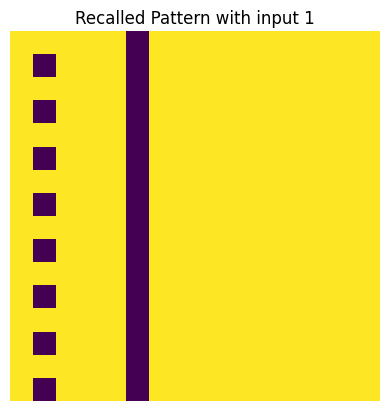

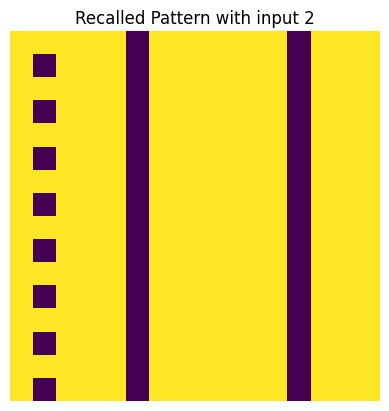

In [19]:
recalled_pattern_1 = hopfield_net.recall(noisy_pattern_1)
recalled_pattern_2 = hopfield_net.recall(noisy_pattern_2)

hopfield_net.plot_pattern(recalled_pattern_1, "Recalled Pattern with input 1")
hopfield_net.plot_pattern(recalled_pattern_2, "Recalled Pattern with input 2")

## Explanation
**Matching Algorithm:**

* The recall method is used to bring the input pattern to a stable state.
* The match_pattern method then compares the recalled pattern to each stored pattern, measuring similarity by counting the number of matching elements.
* The pattern with the highest similarity is considered the closest match.

**Output:**
* The output shows the input pattern, the closest matching stored pattern, and its index. This gives an idea of how well the input matches the stored patterns, even if it is noisy.

**Example Output**

For a noisy input pattern, the network will ideally match it to the closest stored pattern, showing the robustness of the Hopfield network in retrieving patterns despite imperfections in input.